In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("../data/raw/ruddit.csv", usecols=["txt", "offensiveness_score"])
df = df.rename(columns={"txt": "comment", "offensiveness_score": "score"})

In [3]:
df.head(2)

,comment,score
0,> The difference in average earnings between m...,-0.083
1,"The myth is that the ""gap"" is entirely based o...",-0.022


In [4]:
print("---- Comentarios de apoyo ----")
[print("[Comment Score]", c[0], c[1]) for c in df.loc[df.score < -0.5].sample(n=3, random_state=2).values];

---- Comentarios de apoyo ----
[Comment Score] Queens of The Stone Age.  -0.688
[Comment Score] Thanks and good luck! You can do it!! -0.667
[Comment Score] It's not a direct comparison, you're right.  -0.63


In [5]:
print("---- Discursos de odio ----")
[print("[Comment Score]", c[0], c[1]) for c in df.loc[df.score > 0.7].sample(n=3, random_state=2).values];

---- Discursos de odio ----
[Comment Score] Nope.  If the wife gets to fuck someone else, do do you. 0.708
[Comment Score] haha, right? The fuck was his statement even thinking? "Yea, let's crush the economy just a little more!" 0.717
[Comment Score] Don’t fuck a rope. 0.708


--- Distribución de la variable objetivo (datos originales) ---


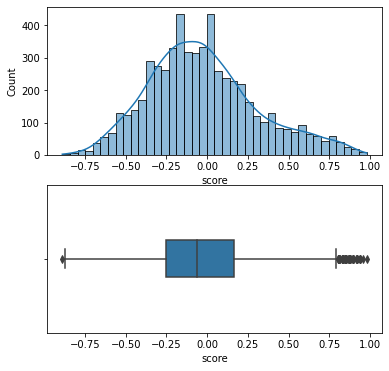

In [6]:
print("--- Distribución de la variable objetivo (datos originales) ---")
fig, ax = plt.subplots(2, figsize=(6, 6))
sns.histplot(df.score, kde=True, ax=ax[0]);
sns.boxplot(data=df, x="score", width=.25, ax=ax[1]);

### Primeros pasos - preprocesamiento simple

#### [deleted] y [removed]

In [7]:
# Hay comentarios que ya se han borrado (Valores [deleted] or [removed])
ccount = df.comment.value_counts()
ccount[ccount > 1]

[deleted]    116
[removed]     12
Name: comment, dtype: int64

In [7]:
# Borramos los comentarios eliminados
df = df[~df.comment.isin(["[deleted]", "[removed]"])]
print("Numero de comentarios:", df.shape[0])

Numero de comentarios: 5710


In [24]:
# [print("[" + str(i) + "]", t) for i, t in enumerate(df[df.score > .25].comment)];

#### Mayúsculas

Tanto dejar las mayúsculas como convertir todo el texto a minúsculas tiene sus ventajas y desventajas. En este caso buscamos reducir el vocabulario, es decir, el número de variables para facilitar el entrenamiento de los modelos.

In [10]:
# Convertimos a minúsculas??? No hay respuesta correcta.
df.comment = df.comment.str.lower()

#### Eliminamos espacios sobrantes, caracteres extraños, menciones...

Reducimos el ruido del dataset suprimiendo información que no es útil.

In [11]:
# Eliminamos espacios extra
df.comment = df.comment.apply(
    lambda x: ' '.join([w for w in str(x).split()])
)

In [12]:
# Eliminamos carácter &#x200b; - Caracter UNICODE que representa el espacio.
# [print("[" + str(i) + "]", t) for i, t in enumerate(df[df.comment.str.contains("&#x200b;")].head(10).comment)];
df.comment = df.comment.str.replace("&#x200b;", "")

In [19]:
# Eliminar carácter >. Ruido tras la extracción de texto de Reddit
df.comment = df.comment.str.replace(">", "")

In [10]:
# TODO: Eliminamos menciones a canales y usuarios
search = [" r/", " /r/", " u/", " /u/"]
print(df[df.comment.str.contains("|".join(search))].shape[0])
# [print("[" + str(i) + "]", "[SCORE:] "+ str(t[1]) + " -", t[0]) for i, t in enumerate(df[df.comment.str.contains("|".join(search))].values)]

43


In [15]:
# FUERA DE ALCANCE (Primer borrador): Expandir contracciones (IMO, LOL...)
# [print(t) for t in df[df.comment.str.contains(" lol ")].comment];

### Modelo Baseline - TFIDF + regresor

In [16]:
# TODO: Montamos un modelo baseline como punto de partida
"""tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=lambda doc: doc,
    preprocessor=lambda doc: doc,
    token_pattern=None
)""" 
tfidf = None